In [11]:
import torch
import numpy as np

In [95]:
def PE(pos,i):
    d_model = np.float32(512)
    angles = pos/ np.power(10000,2 * (i//2)/d_model)
    pos_encoding = np.zeros(angles.shape)
    pos_encoding[:,0::2] = np.sin(angles[:, 0::2])
    pos_encoding[:,1::2] = np.cos(angles[:, 1::2])
    return pos_encoding

In [82]:
a = np.random.random((50,512))
print(a.shape)
positions = a.shape[0]
dimensions = a.shape[1]
np_positions = np.arange(positions)[:, np.newaxis]
np_dimensions = np.arange(dimensions)[np.newaxis,:]

(50, 512)


In [96]:
PE(np_positions,np_dimensions)

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.84147098,  0.82185619,  0.8019618 , ...,  0.99999999,
         0.99999999,  0.99999999],
       [ 0.90929743,  0.93641474,  0.95814438, ...,  0.99999998,
         0.99999998,  0.99999998],
       ...,
       [ 0.12357312,  0.97718982, -0.24295525, ...,  0.99998629,
         0.99998725,  0.99998813],
       [-0.76825466,  0.73123591,  0.63279754, ...,  0.9999857 ,
         0.9999867 ,  0.99998762],
       [-0.95375265, -0.14402692,  0.99899052, ...,  0.9999851 ,
         0.99998614,  0.9999871 ]])

In [64]:
a = get_angles(positions,dimensions,512)

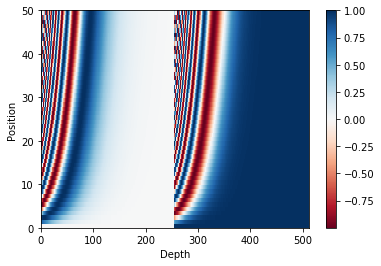

In [97]:
import matplotlib.pyplot as plt

plt.pcolormesh(a, cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

In [91]:
def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    return pos * angle_rates

def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)
    return angle_rads

In [68]:
pos_encoding = positional_encoding(50, 512)
print (pos_encoding) # 크기 출력

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.00000000e+00 9.64661620e-01 ... 1.07460783e-04
  1.03663293e-04 1.03663293e-04]
 [2.00000000e+00 2.00000000e+00 1.92932324e+00 ... 2.14921566e-04
  2.07326586e-04 2.07326586e-04]
 ...
 [4.70000000e+01 4.70000000e+01 4.53390961e+01 ... 5.05065679e-03
  4.87217476e-03 4.87217476e-03]
 [4.80000000e+01 4.80000000e+01 4.63037578e+01 ... 5.15811758e-03
  4.97583806e-03 4.97583806e-03]
 [4.90000000e+01 4.90000000e+01 4.72684194e+01 ... 5.26557836e-03
  5.07950135e-03 5.07950135e-03]]
